In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import sys
import os

sys.path.append(os.path.abspath("../src"))

# Import feature selection helper functions from the src/ directory
# Each function computes a different type of feature importance score
from feature_selection import (
    chi_square_test,
    anova_test,
    mutual_information_test,
    rfe_selection,
    tree_feature_importance
)

# Load the pre-cleaned Processed Dataset
df = pd.read_csv("../data/processed/heart_disease_clean.csv")

# Define target and features
target = "Heart Disease Status"
X = df.drop(columns=[target])
y = df[target]



<h3>Correlation Analysis (Numerical Only)</h3>

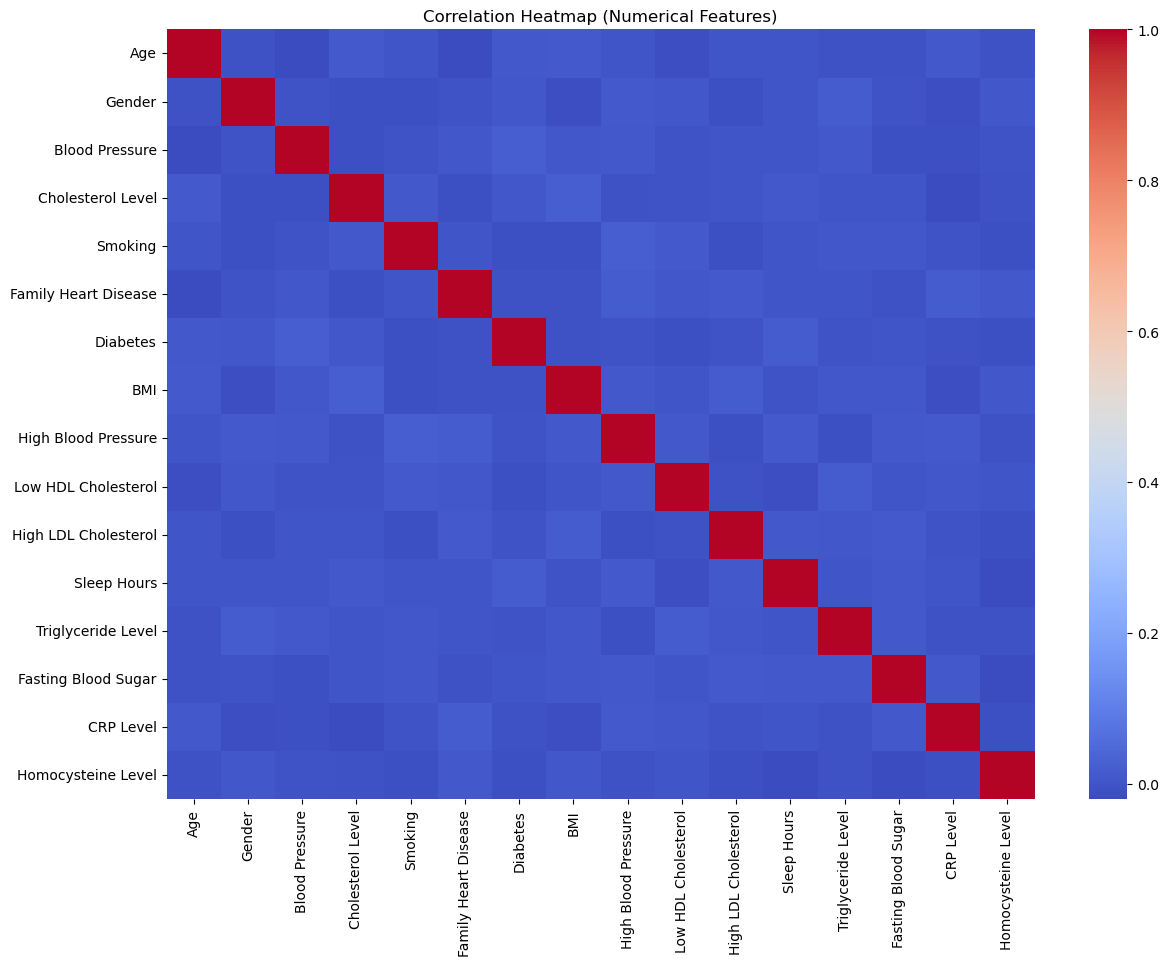

In [3]:
# Select numerical columns for correlation heatmap
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Visualize linear relationships between numerical features
plt.figure(figsize=(14,10))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


<h3>1. Chi-Square Test (For Categorical Features)</h3>

In [4]:
# Evaluates dependency between categorical features and the target
chi_results = chi_square_test(X, y)
chi_results


,Feature,Chi2 Score,p-value
21,Stress Level_Medium,4.084482,0.043279
20,Stress Level_Low,3.320783,0.068409
1,Gender,1.472720,0.224917
19,Alcohol Consumption_Medium,1.437328,0.230572
7,BMI,0.631216,0.426910
23,Sugar Consumption_Medium,0.492308,0.482900
10,High LDL Cholesterol,0.340421,0.559586
2,Blood Pressure,0.332351,0.564278
17,Exercise Habits_Medium,0.297794,0.585269
5,Family Heart Disease,0.282663,0.594961


<h3>2. ANOVA Test (For Numerical Features)</h3>

In [5]:
# Measures how well each numerical feature separates the target classes
anova_results = anova_test(X, y)
anova_results


,Feature,ANOVA Score,p-value
21,Stress Level_Medium,6.199663,0.012794
20,Stress Level_Low,4.972710,0.025772
7,BMI,3.874613,0.049049
1,Gender,2.958741,0.085445
19,Alcohol Consumption_Medium,2.925236,0.087236
2,Blood Pressure,1.925442,0.165289
0,Age,0.852051,0.355995
23,Sugar Consumption_Medium,0.729252,0.393146
15,Homocysteine Level,0.689078,0.406498
10,High LDL Cholesterol,0.672414,0.412231


<h3>3. Mutual Information Test</h3>

In [6]:
# Captures nonlinear relationships between each feature and the target
mi_results = mutual_information_test(X, y)
mi_results


,Feature,MI Score
13,Fasting Blood Sugar,0.006011
9,Low HDL Cholesterol,0.005977
19,Alcohol Consumption_Medium,0.005941
3,Cholesterol Level,0.005608
10,High LDL Cholesterol,0.005420
11,Sleep Hours,0.003807
5,Family Heart Disease,0.003522
1,Gender,0.002372
15,Homocysteine Level,0.002270
17,Exercise Habits_Medium,0.001725


<h3>4. Recursive Feature Elimination (RFE)</h3>

In [7]:
# Uses a model (usually Logistic Regression or SVM) to progressively remove weak features
# n_features=10 means: select the top 10 features
rfe_results = rfe_selection(X, y, n_features=10)
rfe_results


,Feature,Selected,Rank
1,Gender,True,1
2,Blood Pressure,True,1
7,BMI,True,1
5,Family Heart Disease,True,1
10,High LDL Cholesterol,True,1
21,Stress Level_Medium,True,1
22,Sugar Consumption_Low,True,1
19,Alcohol Consumption_Medium,True,1
20,Stress Level_Low,True,1
23,Sugar Consumption_Medium,True,1


<h3>5. Decision Tree Feature Importance</h3>

In [8]:
# Uses a Decision Tree classifier to measure feature importance based on information gain
tree_results = tree_feature_importance(X, y)
tree_results


,Feature,Importance
11,Sleep Hours,0.118427
7,BMI,0.109508
12,Triglyceride Level,0.099775
15,Homocysteine Level,0.094969
14,CRP Level,0.094260
0,Age,0.091949
3,Cholesterol Level,0.089394
13,Fasting Blood Sugar,0.085482
2,Blood Pressure,0.076878
6,Diabetes,0.015275


<h3>Visualize Top 10 Features (Decision Tree)</h3>

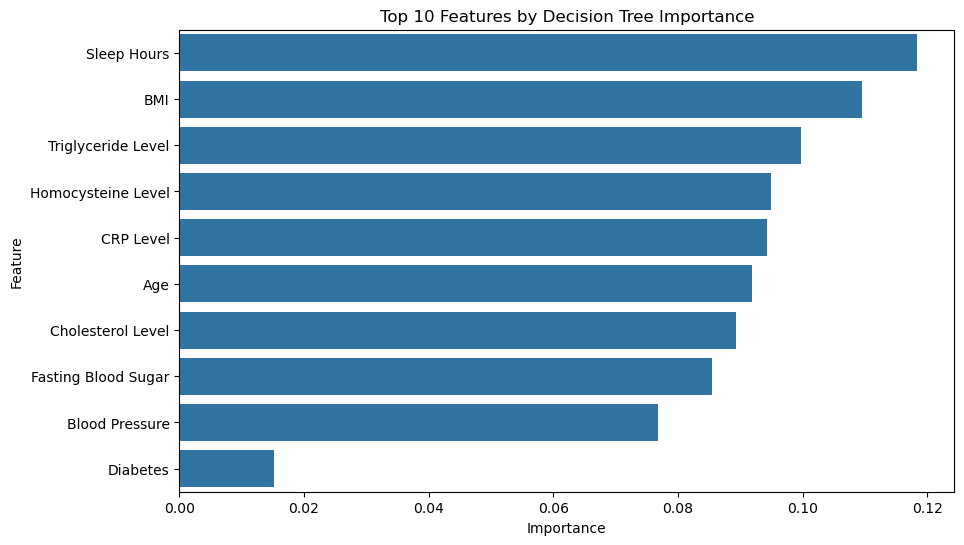

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=tree_results["Importance"].head(10),
            y=tree_results["Feature"].head(10))
plt.title("Top 10 Features by Decision Tree Importance")
plt.show()


<h3>The final list of selected features</h3>

In [10]:
# Number of top features to keep
TOP_N = 10  

top_chi = chi_results.head(TOP_N)["Feature"].tolist()
top_anova = anova_results.head(TOP_N)["Feature"].tolist()
top_mi = mi_results.head(TOP_N)["Feature"].tolist()
top_rfe = rfe_results[rfe_results["Selected"] == True]["Feature"].tolist()
top_tree = tree_results.head(TOP_N)["Feature"].tolist()

In [11]:
# Combine and vote 
all_features = top_chi + top_anova + top_mi + top_rfe + top_tree

feature_votes = pd.Series(all_features).value_counts()

# Features appearing >= 2 times are considered important
selected_features = feature_votes[feature_votes >= 2].index.tolist()

print("Selected Features:", selected_features)

Selected Features: ['Alcohol Consumption_Medium', 'Gender', 'High LDL Cholesterol', 'BMI', 'Blood Pressure', 'Stress Level_Low', 'Stress Level_Medium', 'Sugar Consumption_Medium', 'Family Heart Disease', 'Homocysteine Level', 'Exercise Habits_Medium', 'Age', 'Fasting Blood Sugar', 'Cholesterol Level', 'Sleep Hours']


In [12]:
# Save to JSON file
with open("../data/processed/selected_features.json", "w") as f:
    json.dump(selected_features, f)

print("\nSaved to selected_features.json")



Saved to selected_features.json
